In [39]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time


In [40]:
regrein = pd.read_csv('../input/diabetes.csv')
regrein.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [41]:
regrein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
PatientID                 15000 non-null int64
Pregnancies               15000 non-null int64
PlasmaGlucose             15000 non-null int64
DiastolicBloodPressure    15000 non-null int64
TricepsThickness          15000 non-null int64
SerumInsulin              15000 non-null int64
BMI                       15000 non-null float64
DiabetesPedigree          15000 non-null float64
Age                       15000 non-null int64
Diabetic                  15000 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


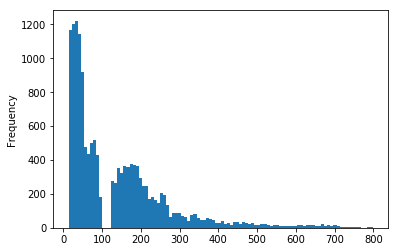

In [42]:
regrein['SerumInsulin'].plot.hist(bins=100)

In [43]:
columns = [col for col in regrein.columns if col not in ['SerumInsulin','PatientID']]
X = regrein[columns]
y = regrein['SerumInsulin'] 

In [44]:
X=X.head(2000)
y=y.head(2000)

In [45]:
X.shape

(2000, 8)

In [46]:
y.shape

(2000,)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 


In [48]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1600, 8)

(400, 8)

(1600,)

(400,)

In [49]:
lr = LogisticRegression(penalty='l1',dual=False,max_iter=110)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lr.fit(X,y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
lr.score(X,y)

0.0485

In [52]:
#kfold = KFold(n_splits=3, random_state=7)
#kfold

In [53]:
#result = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')
#result

In [54]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)
param_grid 

{'dual': [True, False], 'max_iter': [100, 110, 120, 130, 140]}

In [55]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futu

Best: 0.011000 using {'dual': False, 'max_iter': 100}
Execution time: 95.76225519180298 ms


In [56]:
grid_result.best_score_

0.011

In [57]:
lr=LogisticRegression(dual=False,max_iter=100)
fitting = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X,y)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0575

In [22]:
regre2=regrein[['PatientID','SerumInsulin']]
regre2.head()

,PatientID,SerumInsulin
0,1354778,23
1,1147438,36
2,1640031,35
3,1883350,304
4,1424119,35


In [ ]:
#a = input()

regre2.loc[regre2['PatientID']==input()]

In [32]:
#hemos podido comprobar que no son linealmente separables